190.671573355
174.175950045
159.329534851
145.966629636
133.938193816
123.110169522
113.361975175
104.585150525
96.6821379352
89.5651862052
83.1553646166
77.3816761127
72.1802596474
67.4936727377
63.2702461529
59.4635034895
56.0316391054
52.9370485466
50.1459061885
47.6277853425
45.3553165603
43.3038802936
41.4513304553
39.7777457747
38.2652061528
36.8975915032
35.6604008175
34.5405894228
33.5264226007
32.6073439242
31.7738568305
31.0174181017
30.3303420531
29.7057143551
29.1373145181
28.6195461705
28.147374346
27.7162690749
27.3221546469
26.9613639729
26.630597536
26.3268864679
26.047559337
25.7902122748
25.5526821054
25.3330221751
25.129480612
24.9404807701
24.7646036392
24.600572022
24.4472363021
24.3035616411
24.1686164633
24.0415620967
23.9216434549
23.8081806557
23.7005614806
23.598234593
23.5007034371
23.4075207492
23.3182836208
23.2326290572
23.1502299825
23.0707916446
22.9940483826
22.9197607176
22.8477127356
22.7777097337
22.7095761018
22.6431534169
22.5782987289
22.514883018

9.987268793
9.98231209309
9.97737090209
9.97244516583
9.96753483036
9.96263984191
9.95776014694
9.95289569206
9.94804642413
9.94321229018
9.93839323744
9.93358921335
9.92880016552
9.92402604177
9.91926679013
9.91452235879
9.90979269616
9.90507775082
9.90037747156
9.89569180734
9.89102070734
9.8863641209
9.88172199756
9.87709428704
9.87248093925
9.8678819043
9.86329713247
9.85872657422
9.8541701802
9.84962790125
9.84509968838
9.8405854928
9.83608526587
9.83159895916
9.8271265244
9.82266791352
9.8182230786
9.81379197192
9.80937454592
9.80497075323
9.80058054666
9.79620387916
9.7918407039
9.78749097418
9.78315464352
9.77883166556
9.77452199416
9.7702255833
9.76594238718
9.76167236014
9.7574154567
9.75317163152
9.74894083948
9.74472303558
9.740518175
9.7363262131
9.73214710539
9.72798080753
9.72382727539
9.71968646494
9.71555833237
9.711442834
9.70733992631
9.70324956595
9.69917170974
9.69510631463
9.69105333775
9.68701273638
9.68298446797
9.67896849011
9.67496476054
9.67097323719
9.666993

8.32602754444
8.32561847047
8.32521011815
8.32480248566
8.3243955712
8.32398937295
8.32358388913
8.32317911793
8.32277505758
8.32237170628
8.32196906227
8.32156712377
8.32116588901
8.32076535624
8.3203655237
8.31996638963
8.31956795229
8.31917020995
8.31877316086
8.3183768033
8.31798113554
8.31758615586
8.31719186254
8.31679825389
8.31640532819
8.31601308374
8.31562151884
8.31523063182
8.31484042098
8.31445088464
8.31406202114
8.31367382879
8.31328630594
8.31289945092
8.31251326208
8.31212773778
8.31174287635
8.31135867617
8.3109751356
8.310592253
8.31021002676
8.30982845524
8.30944753684
8.30906726994
8.30868765293
8.30830868422
8.30793036219
8.30755268527
8.30717565186
8.30679926038
8.30642350925
8.3060483969
8.30567392175
8.30530008224
8.30492687681
8.3045543039
8.30418236197
8.30381104946
8.30344036483
8.30307030655
8.30270087307
8.30233206288
8.30196387445
8.30159630625
8.30122935678
8.30086302452
8.30049730795
8.3001322056
8.29976771594
8.29940383749
8.29904056876
8.29867790827
8

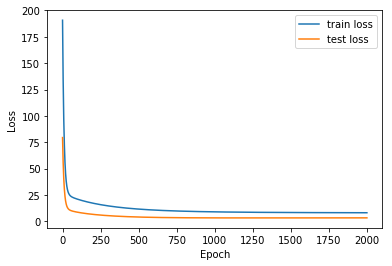

In [2]:
from sklearn import datasets
import numpy as np
from scipy.sparse import csr_matrix, hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



def data_loader(train_file):
    X,Y = datasets.load_svmlight_file(train_file)
    one = np.ones(506).reshape(506,1)
    X = hstack( [X, csr_matrix(one)] ).todense()
    Y = np.array(Y).reshape(506,1)
    return X, Y

def train(X_train, Y_train, learnig_rate, theta):
    Y_prediction = X_train.dot(theta)
    G = -np.dot(X_train.transpose(),  Y_train ) + np.dot(X_train.transpose(),Y_prediction) # G为loss函数的导
    theta -= learning_rate * G 
    return theta

def test(X_test, Y_test, theta):
    Y_prediction = X_test.dot(theta)
    loss=0.5/506 * (np.dot( (Y_test - Y_prediction).transpose(), Y_test - Y_prediction )).sum()
    return loss
       

if __name__ =="__main__":
    X,Y=data_loader('housing.txt')
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    theta = np.zeros((X_train.shape[1], 1))
    learning_rate = 0.00003
    List1=[]
    List2=[]
    for t in range(2000):
        theta = train(X_train, Y_train, learning_rate,theta)
        Y_prediction = X_train.dot(theta)
        loss1 = 0.5/506 * (np.dot( (Y_train - Y_prediction).transpose(), Y_train - Y_prediction )).sum()
        List1.append(loss1)
        print(loss1)
        loss2 = test(X_test,Y_test,theta)
        List2.append(loss2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(List1, label="train loss")
    plt.plot(List2, label="test loss")
    plt.legend(loc='upper right')
    plt.show()

